<a href="https://colab.research.google.com/github/rachtorr/lsamp_pheno/blob/main/NEON_workflow_Rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEON phenology data visualization

[steps to code are from this webste](https://projects.ecoforecast.org/neon4cast-ci/targets.html)

When working in R, we first load in libraries, which contain functions we will be using.

In [2]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Description of data**:

- “duration” is the time-step of the variable where PT30M is a 30-minute mean, P1D is a daily mean, and P1W is a weekly total.

- The “forecast horizon” is the number of days-ahead that we want you to forecast.

- The “latency” is the time between data collection and data availability in the target file

- "variable" is what is being observed
  - **gcc_90** - Green chromatic coordinate is the ratio of the green digital number to the sum of the red, green, blue digital numbers from a digital camera.
Horizon: 30 days
Latency: ~ 2 days
  - **rcc_90** -	Red chromatic coordinate is the ratio of the Red digital number to the sum of the red, green, blue digital numbers from a digital camera.
Horizon: 30 days
Latency: ~ 2 days

- "site_id" is the code for the location. See all locations where phenology data is available ([see table](https://projects.ecoforecast.org/neon4cast-ci/targets.html) where phenology is marked 1)

- "observation" is the value for the variable being observed

- "datetime" is the date, and if measure less than a day, the time

## Load in and preview data

In example below the following steps are taken

1. load in data
2. filter by SJER (San Joaquin Experimental Range in California)
3. preview the data frame with `head()`
4. run summary to see the type of data and the values


In [5]:
#set download url
url <- "https://sdsc.osn.xsede.org/bio230014-bucket01/challenges/targets/project_id=neon4cast/duration=P1D/phenology-targets.csv.gz"

# get data frame from website
phenology_targets <- read_csv(url, show_col_types = FALSE)

# filter by site id
sites <- phenology_targets %>% filter(site_id=="SJER")

# preview the first six rows
head(sites)

# get a summary of the data
summary(sites)


project_id,site_id,datetime,duration,variable,observation
<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>
neon4cast,SJER,2016-01-29,P1D,gcc_90,NA
neon4cast,SJER,2016-01-30,P1D,gcc_90,NA
neon4cast,SJER,2016-01-31,P1D,gcc_90,NA
neon4cast,SJER,2016-02-01,P1D,gcc_90,NA
neon4cast,SJER,2016-02-02,P1D,gcc_90,NA
neon4cast,SJER,2016-02-03,P1D,gcc_90,NA


  project_id          site_id             datetime                  
 Length:6604        Length:6604        Min.   :2016-01-29 00:00:00  
 Class :character   Class :character   1st Qu.:2018-05-03 00:00:00  
 Mode  :character   Mode  :character   Median :2020-08-05 12:00:00  
                                       Mean   :2020-08-05 12:00:00  
                                       3rd Qu.:2022-11-09 00:00:00  
                                       Max.   :2025-02-11 00:00:00  
                                                                    
   duration           variable          observation    
 Length:6604        Length:6604        Min.   :0.3237  
 Class :character   Class :character   1st Qu.:0.3732  
 Mode  :character   Mode  :character   Median :0.3792  
                                       Mean   :0.3842  
                                       3rd Qu.:0.3922  
                                       Max.   :0.5859  
                                       NA's   :2024    

[1] "gcc_90" "rcc_90"

Based on the output, consider the following:

- What is the time range for these observations?
- How many missing values (NA) does it contain?
- What is the duration?

## Visualizing data

We are going to use ggplot2, which is a package in R, to visualize our data.

You can read more, and see examples of chart types, [here](https://ggplot2.tidyverse.org/)

The pattern to follow is:

`ggplot(dataframe, aes(x, y)) + geom_charttype()`

See the first example of a time series below

Warning message:
“Removed 2024 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2024 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


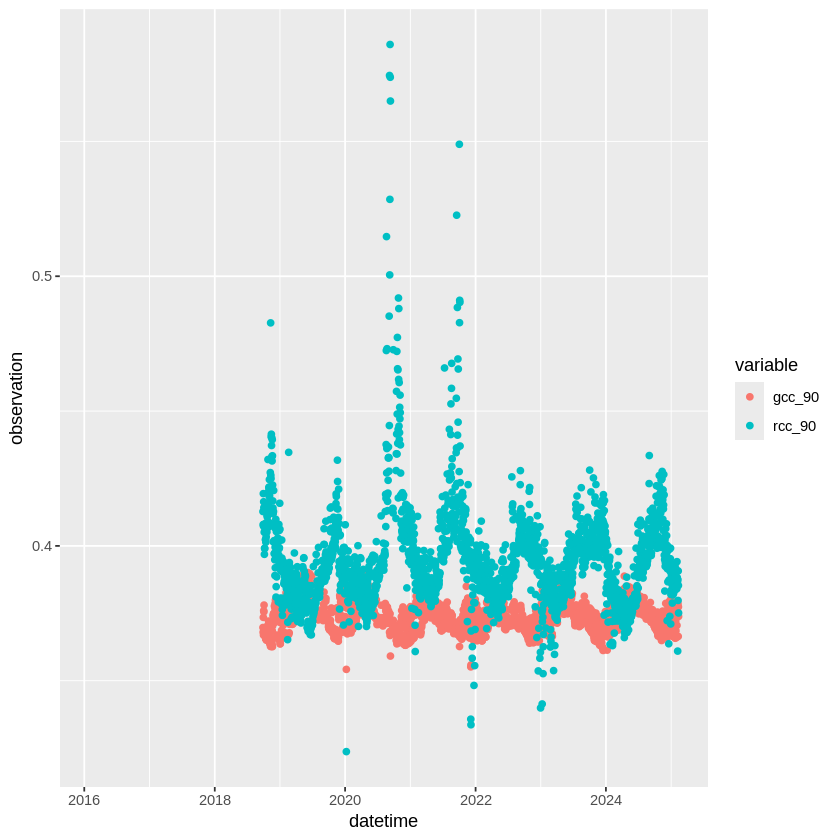

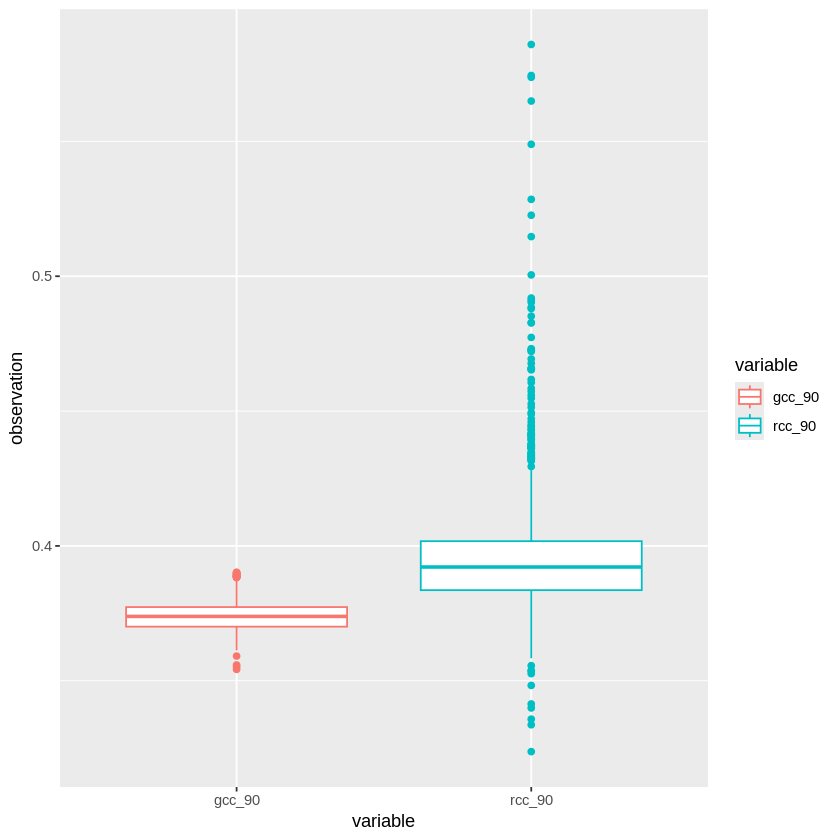

In [9]:
# plot time series
ggplot(sites, aes(x=datetime, y=observation, col=variable)) +
  geom_point()

# plot a boxplot
ggplot(sites, aes(x=variable, y=observation, col=variable)) +
  geom_boxplot()

What patterns do you notice?

What time of year do we see peak gcc90 and rcc90?

If you were to go back and re-run this for a different site, would you expect the same patterns?

